In [7]:
import spacy
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../data/comentarios.csv")

# Usamos solo la columna de comentarios
comentarios = df["texto_comentario"].values
print("Ejemplos de comentarios:\n", comentarios[:3])

Ejemplos de comentarios:
 ['Excelente teléfono, la cámara es increíble y la batería dura todo el día.'
 'Buena calidad de la tela, un poco ajustada pero muy cómoda.'
 'La laptop es rapidísima y muy ligera, la recomiendo mucho.']


In [9]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 61.1 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [10]:
nlp = spacy.load("es_core_news_sm")
def preprocesar(texto):
    doc = nlp(texto.lower())
    tokens = [
        token.lemma_
        for token in doc
        if not token.is_stop and token.is_alpha
    ]
    return " ".join(tokens)

comentarios_pre = [preprocesar(c) for c in comentarios]

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(comentarios_pre)

print("Shape:", X.shape)  # (n_comentarios, vocabulario)
print("Matriz dispersa (primeros 3 comentarios):\n", X.toarray()[:3])

print("\nVocabulario:", vectorizer.get_feature_names_out())

Shape: (100, 202)
Matriz dispersa (primeros 3 comentarios):
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

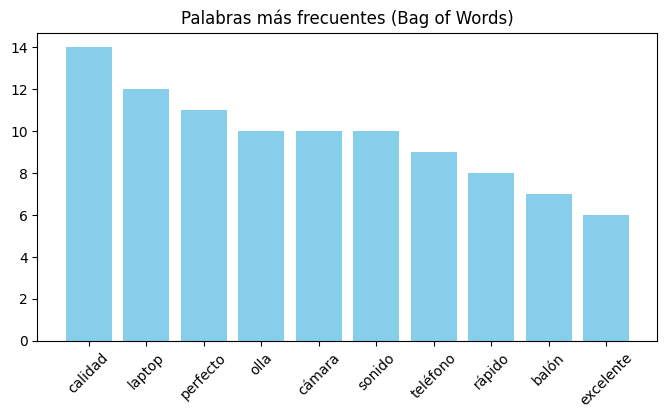

In [11]:
word_counts = np.asarray(X.sum(axis=0)).ravel()
vocab = vectorizer.get_feature_names_out()

# Ordenar por frecuencia
sorted_idx = word_counts.argsort()[::-1]
top_words = vocab[sorted_idx][:10]
top_counts = word_counts[sorted_idx][:10]

plt.figure(figsize=(8,4))
plt.bar(top_words, top_counts, color="skyblue")
plt.title("Palabras más frecuentes (Bag of Words)")
plt.xticks(rotation=45)
plt.show()